# Titanic - Machine Learning from Disaster 

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Overview
The data has been split into two groups:

#### training set (train.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

#### test set (test.csv)
The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Aim of the data set 

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Understand the data set 

PassengerId: Unique identifier for each passenger.

Survived: Indicates whether the passenger survived or not. 0 = did not survive, 1 = survived.

Pclass: Passenger class. 1 = first class, 2 = second class, 3 = third class.

Name: Name of the passenger.

Sex: Gender of the passenger. Male or female.

Age: Age of the passenger in years.

SibSp: Number of siblings/spouses also aboard the Titanic.

Parch: Number of parents/children also aboard the Titanic.

Ticket: Ticket number.

Fare: Cost of the ticket.

Cabin: Cabin number.

Embarked: Port of embarkation. C = Cherbourg, Q = Queenstown, S = Southampton.

## Questions basic stats that I can in this dataset

What is the average age of passengers on the Titanic?

What is the median fare paid by passengers on the Titanic?

What is the range of ages among passengers on the Titanic?

What is the most common embarkation point for passengers on the Titanic?

How many passengers had siblings or spouses also on board the Titanic?

How many passengers had parents or children also on board the Titanic?

What is the variance of ticket fares among passengers on the Titanic?

What is the standard deviation of passenger ages on the Titanic?

What is the minimum and maximum value of the fare variable in the Titanic dataset?

How many passengers in the dataset survived the sinking of the Titanic?

## Questions that I might use for logistic regression

Can we preict who survided or not survided?

Can we  predict who survided based on the Pclass?

Can we predict who survided based on age and sex? Male or female.

Can we predict who survided by SibSP? SibSp  SibSP.

Can we predict who survided by Parch? Parch  Number of parents/children also aboard the Titanic.

Can we predict who survided by ticket number? Ticket

Can we predit who survided by fare? Fare

Can we predict who survived by cabin number? Cabin

Can we predict who survided by door where Embarked? Embarked

 C = Cherbourg, Q = Queenstown, S = Southampton

 What avriables can predict more effectivelty the survival rate?

 In the logistic regression, since binary outcomes we might need to classify data into 2 categories as well.


### First Step: Import all the Libraries

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import label_ranking_average_precision_score

In [93]:
### Second: Upload the excel files

In [94]:
gender_data = pd.read_csv("gender_submission.csv")


In [95]:
test_titanic = pd.read_csv('test_titanic.csv')


In [96]:
train_titanic = pd.read_csv('train_titanic.csv')

In [97]:
test_titanic


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [98]:
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
gender_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
#To embedded the survide, We need to generate the same colluns of survided into test and train data
#We want to have same data, with the same structure and collumn

##Basically the problem with this dataset was that the test_titanic and train_titanic did nothave the same variable and collumns.
# Plus we are interested in the variable survival which was not available in the train set.So we hac to insert in the test data the survided variable from the gender data.

In [101]:
test_titanic.insert(1,'Survived', gender_data['Survived']) # where are we extracting from

In [102]:
test_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [103]:
## You can use different approaches 
##Slipting: data prepocessing (steps)

x_train = train_titanic.drop('Survived',axis=1)
y_train = train_titanic['Survived']

X_test = test_titanic.drop('Survived', axis=1)
Y_test =test_titanic['Survived']

## we have to dop the variable survival as if not, we would have bias the data and couse overfitting because we were including the the variable on the X axis as wlel/

In [104]:
x_train.info()

#Plot your histogram, replace your num with median or mean, on age
# You can use minimal scaled to scale variables- we need to stradardized the values between ages, survided, 
# Categorize age valaribles 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Firt we going to describe and do some basic statistics for the train data set
## Train dataset

## First we looked at the missing data

We could see that ageand cabin had quite a lot of missing data which need to be treated


In [105]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Then we described the data to see which will be the best value to impute with. 

In [106]:
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Replace missing values of age with imputation of median.

In [107]:
# Calculate the mode of the wind variable
median = train_titanic['Age'].median()  #The median() function already returns a single value, so there is no need to call .values[0] on it.

# Replace missing values in wind variable with mode
train_titanic['Age'].fillna(median, inplace=True)

In [108]:
### Do the same for the test data

# Calculate the mode of the wind variable
median = test_titanic['Age'].median()  #The median() function already returns a single value, so there is no need to call .values[0] on it.

# Replace missing values in wind variable with mode
test_titanic['Age'].fillna(median, inplace=True)

Replace the missing vale for Fare on the test data

In [109]:
# Calculate the mode of the wind variable
median = test_titanic['Fare'].median()  #The median() function already returns a single value, so there is no need to call .values[0] on it.

# Replace missing values in wind variable with mode
test_titanic['Fare'].fillna(median, inplace=True)

Miss data cabin: is too many, what is advisable to do?

If a variable has a lot of missing values, it may not be feasible to impute or estimate those values, and you may need to consider other options.

In the case of the cabin number variable, if it has a large number of missing values, it may not be possible to impute those missing values accurately. However, you could consider using the available information in other variables to extract some useful features related to the cabin or deck level of the passenger.

For example, you could extract the deck level from the first character of the cabin number, which represents the deck level on the Titanic. You could then create a new variable with the deck level and use that variable in your analysis. Alternatively, you could create a binary variable indicating whether the passenger had a cabin or not, and use that variable in your analysis.

In general, it's important to assess the importance of the variable to the analysis and the extent of missing data before deciding whether to impute or drop the variable. If the variable is not important to the analysis or there is a large amount of missing data, it may be best to drop the variable altogether.

In [110]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
test_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Created a new variable Deck, and replace missing values with unknown

In [112]:
##This allowed me to extract the first letter of the cabin and create a new variable, called deck to extract the first caracter

# Create a new variable 'Deck' based on the first character of the cabin number
train_titanic['Deck'] = train_titanic['Cabin'].str[0] 
#we use the str attribute to access the string values of the Cabin variable and the [0] index to select the first character of the string, which corresponds to the deck level
#create a new variable called Deck that stores the deck level information for each passenger. Finally, we replace any missing deck values with the string 'Unknown'.
# Replace missing deck values with 'Unknown'
train_titanic['Deck'].fillna('Unknown', inplace=True)

In [113]:
##Do the same for the test data

##This allowed me to extract the first letter of the cabin and create a new variable, called deck to extract the first caracter

# Create a new variable 'Deck' based on the first character of the cabin number
test_titanic['Deck'] = test_titanic['Cabin'].str[0] 
#we use the str attribute to access the string values of the Cabin variable and the [0] index to select the first character of the string, which corresponds to the deck level
#create a new variable called Deck that stores the deck level information for each passenger. Finally, we replace any missing deck values with the string 'Unknown'.
# Replace missing deck values with 'Unknown'
test_titanic['Deck'].fillna('Unknown', inplace=True)

In [114]:
# To find out how many categories exist under weather condition
train_titanic["Deck"].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Deck, dtype: int64

In [115]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Deck         891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


1- What is the average age of passengers on the Titanic?


<function matplotlib.pyplot.show(close=None, block=None)>

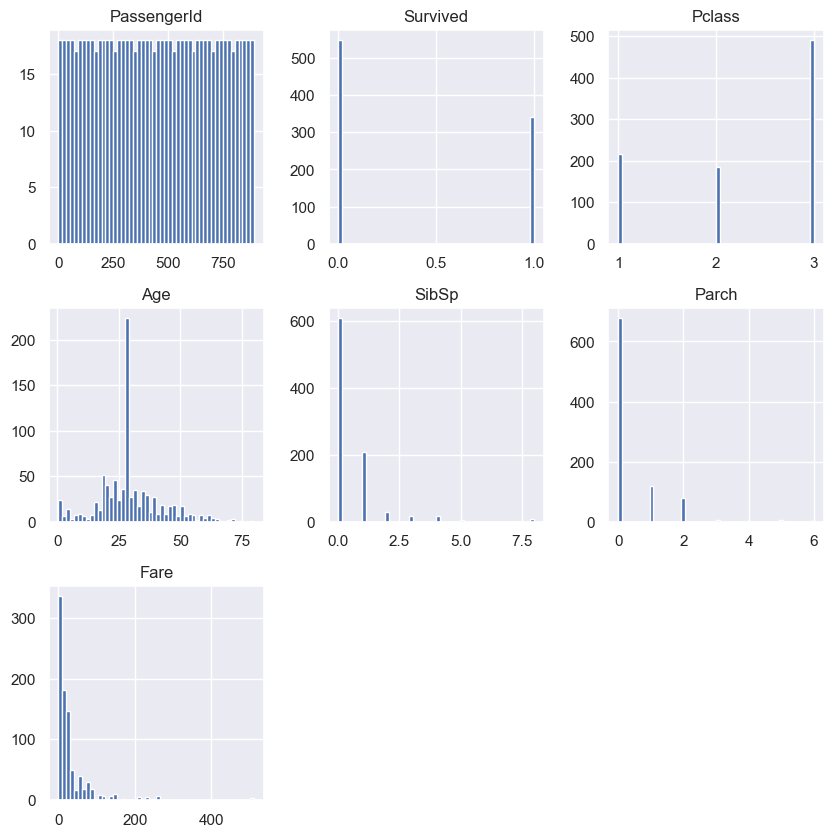

In [116]:
train_titanic.hist(bins=50, figsize=(10, 10))
plt.show

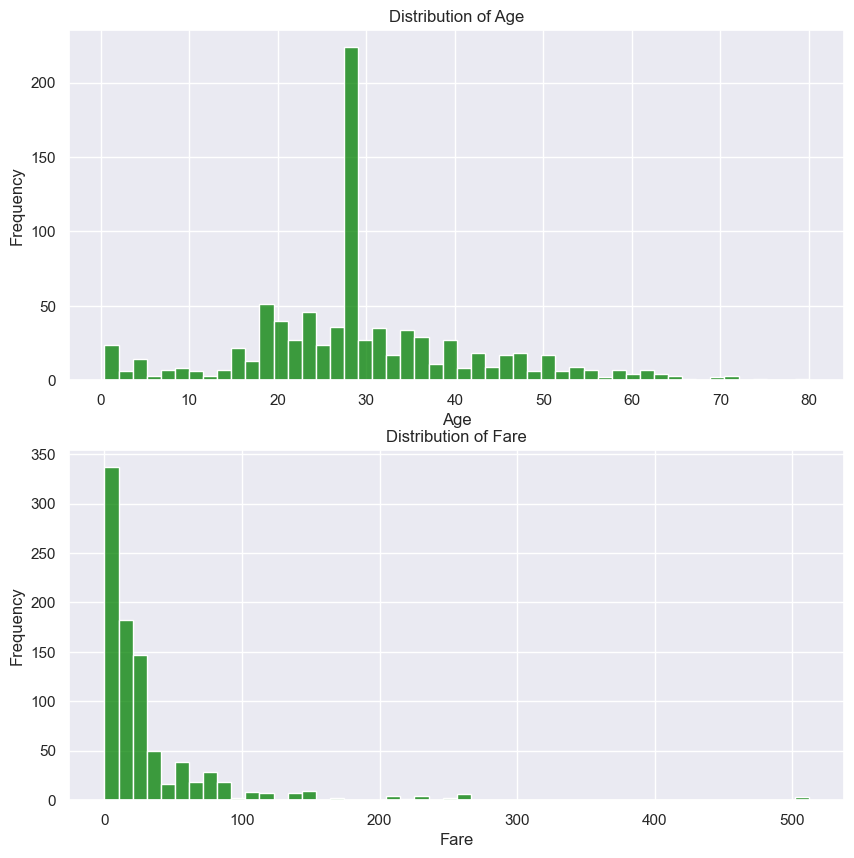

In [117]:

# Create a new figure and set the figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# Generate histograms of Age and Fare variables using Seaborn
sns.histplot(data=train_titanic, x='Age', bins=50,color="green",ax=axes[0])
sns.histplot(data=train_titanic, x='Fare', bins=50,color="green",ax=axes[1])

# Set titles and labels for each subplot
axes[0].set_title('Distribution of Age')
axes[1].set_title('Distribution of Fare')
axes[0].set_xlabel('Age')
axes[1].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.show()

ax.set_facecolor('none')


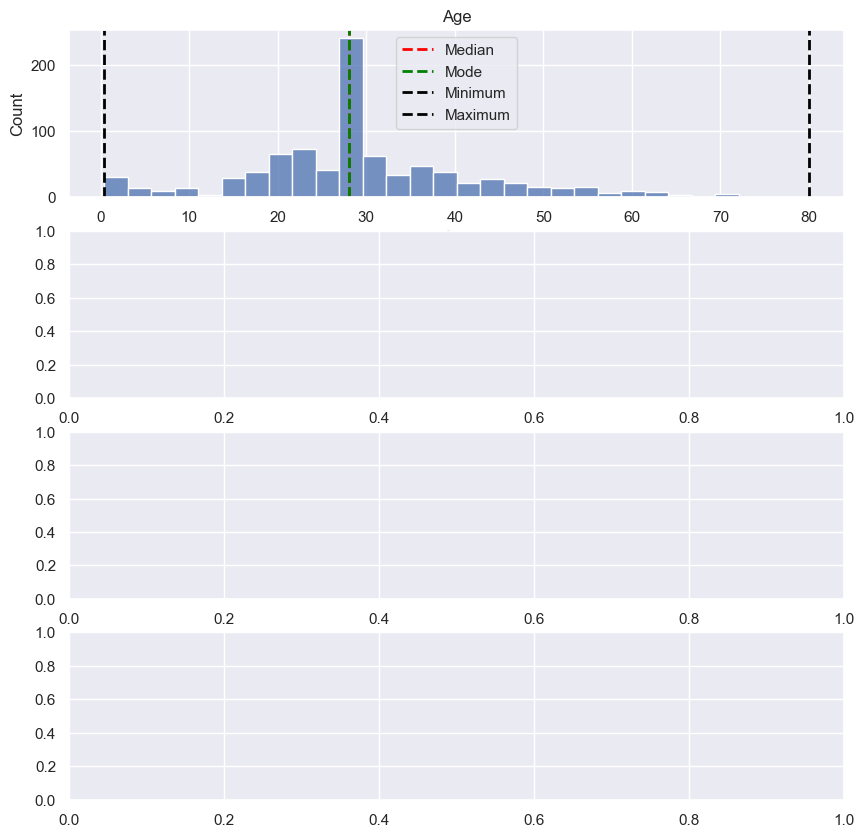

In [118]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 10))
sns.histplot(train_titanic['Age'], ax=axs[0])
axs[0].set_title('Age')
axs[0].axvline(train_titanic['Age'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
axs[0].axvline(train_titanic['Age'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Mode')
axs[0].axvline(train_titanic['Age'].min(), color='black', linestyle='dashed', linewidth=2, label='Minimum')
axs[0].axvline(train_titanic['Age'].max(), color='black', linestyle='dashed', linewidth=2, label='Maximum')
axs[0].legend()


Text(0.5, 0.98, 'Distribution of Age, SibSp, and Parch')

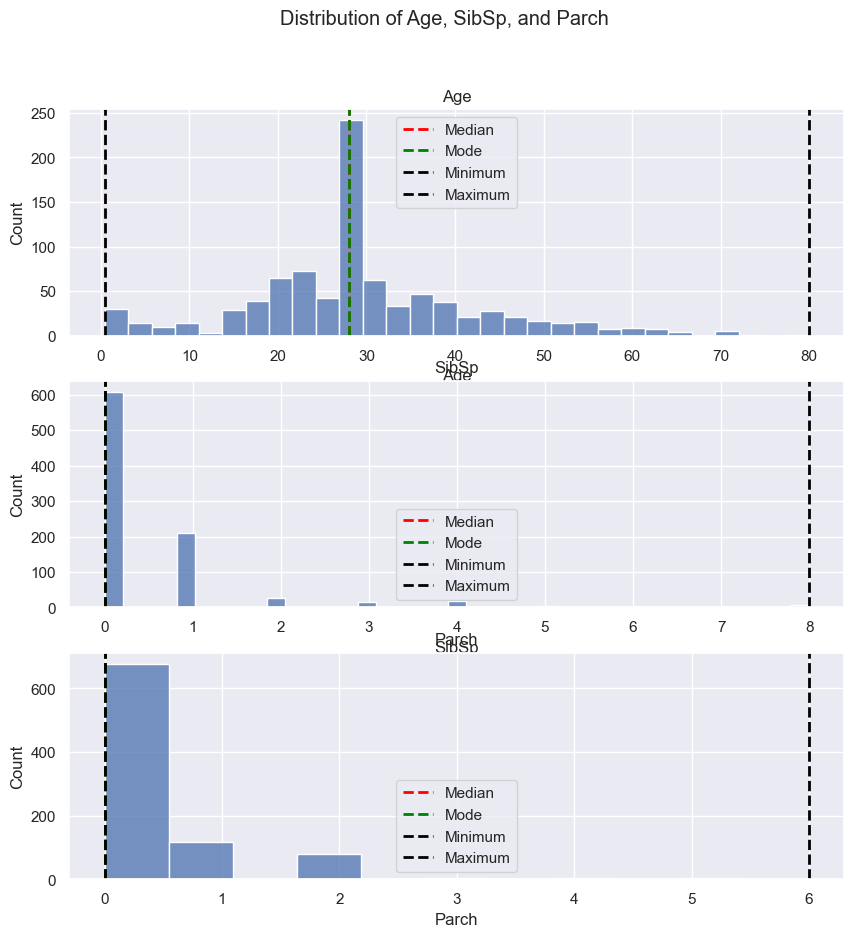

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, figsize=(10, 10))
sns.histplot(train_titanic['Age'], ax=axs[0])
axs[0].set_title('Age')
axs[0].axvline(train_titanic['Age'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
axs[0].axvline(train_titanic['Age'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Mode')
axs[0].axvline(train_titanic['Age'].min(), color='black', linestyle='dashed', linewidth=2, label='Minimum')
axs[0].axvline(train_titanic['Age'].max(), color='black', linestyle='dashed', linewidth=2, label='Maximum')
axs[0].legend()

sns.histplot(train_titanic['SibSp'], ax=axs[1])
axs[1].set_title('SibSp')
axs[1].axvline(train_titanic['SibSp'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
axs[1].axvline(train_titanic['SibSp'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Mode')
axs[1].axvline(train_titanic['SibSp'].min(), color='black', linestyle='dashed', linewidth=2, label='Minimum')
axs[1].axvline(train_titanic['SibSp'].max(), color='black', linestyle='dashed', linewidth=2, label='Maximum')
axs[1].legend()

sns.histplot(train_titanic['Parch'], ax=axs[2])
axs[2].set_title('Parch')
axs[2].axvline(train_titanic['Parch'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
axs[2].axvline(train_titanic['Parch'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Mode')
axs[2].axvline(train_titanic['Parch'].min(), color='black', linestyle='dashed', linewidth=2, label='Minimum')
axs[2].axvline(train_titanic['Parch'].max(), color='black', linestyle='dashed', linewidth=2, label='Maximum')
axs[2].legend()

fig.suptitle('Distribution of Age, SibSp, and Parch')



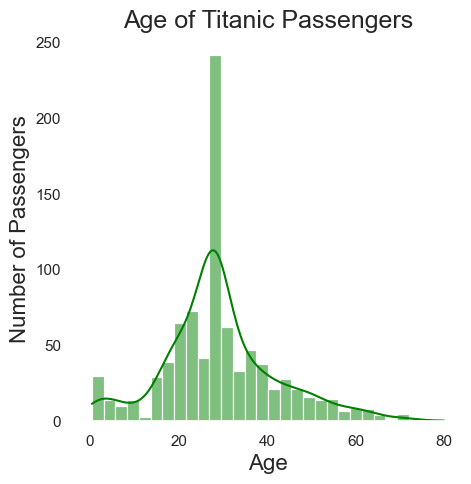

In [120]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(train_titanic['Age'], kde=True, color="green", ax=ax)
ax.set_title('Age of Titanic Passengers', fontsize=18)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Number of Passengers', fontsize=16)
ax.set_facecolor('none')


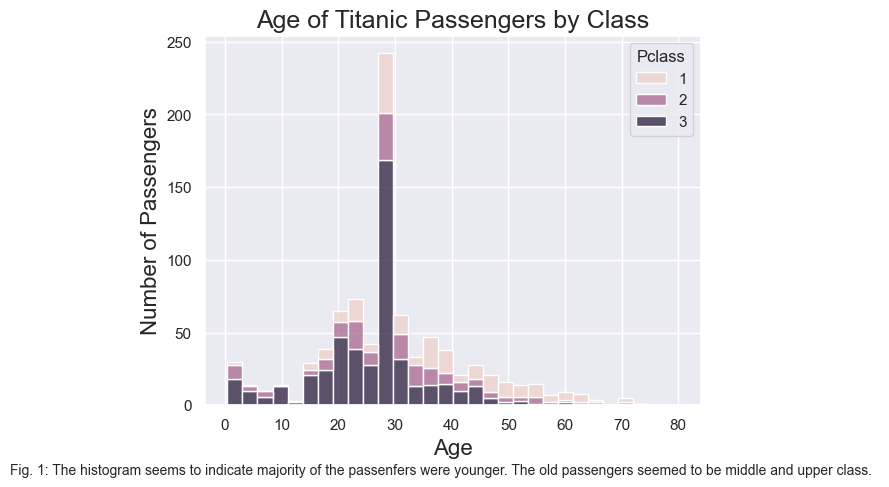

In [121]:
sns.histplot(train_titanic, x="Age", hue="Pclass", multiple='stack') #The default approach to plotting multiple distributions is to “layer” them, but you can also “stack” them

plt.title('Age of Titanic Passengers by Class', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=16)

# Add subtitle below the main title
plt.suptitle('Fig. 1: The histogram seems to indicate majority of the passenfers were younger. The old passengers seemed to be middle and upper class.  ', fontsize=10, y=-0.01)
plt.show()


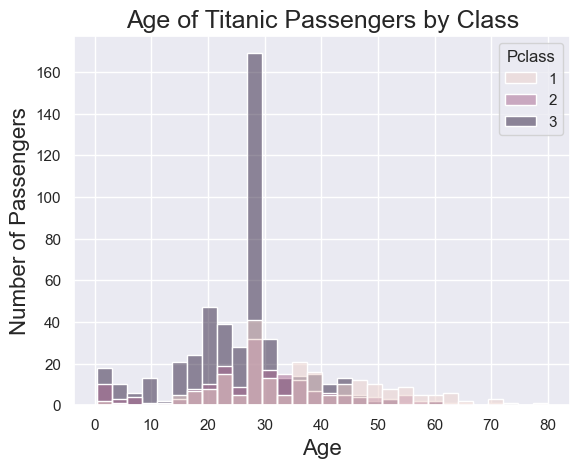

In [122]:
sns.histplot(train_titanic, x="Age", hue="Pclass") #hue is used to draw multiple histograms from a long-form dataset with hue mapping:

plt.title('Age of Titanic Passengers by Class', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=16)
plt.show()

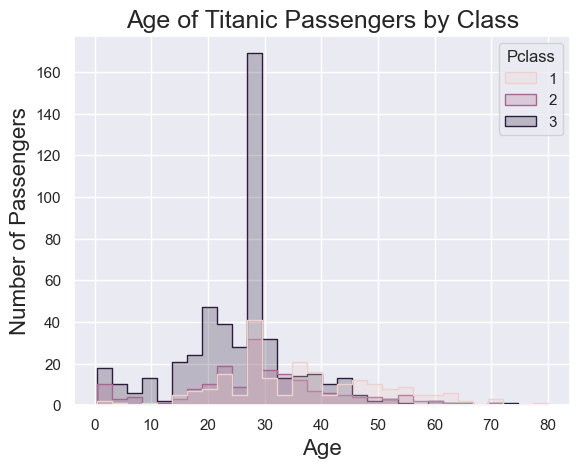

In [123]:
sns.histplot(train_titanic, x="Age", hue="Pclass", element="step") #hue is used to draw multiple histograms from a long-form dataset with hue mapping:

plt.title('Age of Titanic Passengers by Class', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=16)
plt.show()

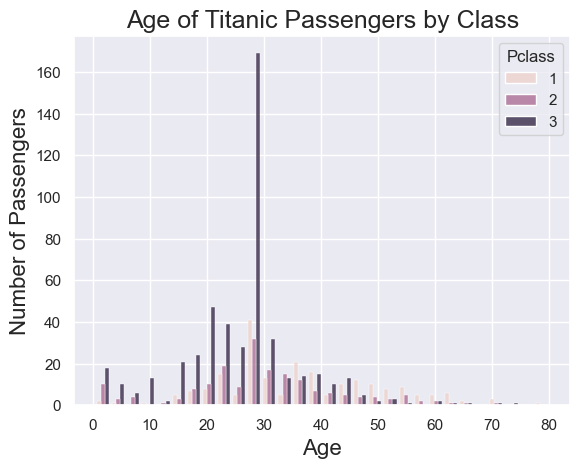

In [124]:
sns.histplot(train_titanic, x="Age", hue="Pclass",multiple="dodge", shrink=.8) #hue is used to draw multiple histograms from a long-form dataset with hue mapping:
plt.title('Age of Titanic Passengers by Class', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=16)
plt.show()

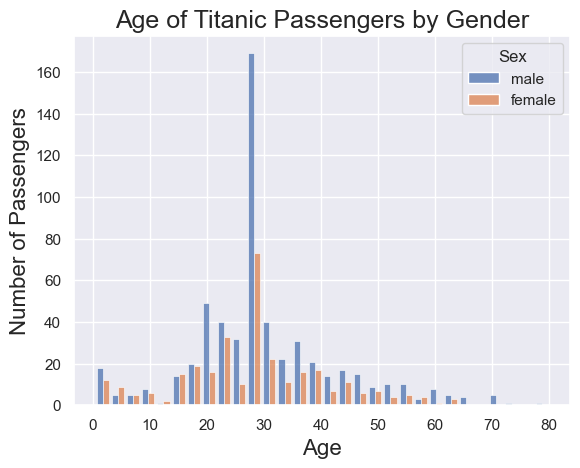

In [125]:
sns.histplot(train_titanic, x="Age", hue="Sex",shrink=.8,multiple="dodge") #hue is used to draw multiple histograms from a long-form dataset with hue mapping:
plt.title('Age of Titanic Passengers by Gender', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=16)
plt.show()


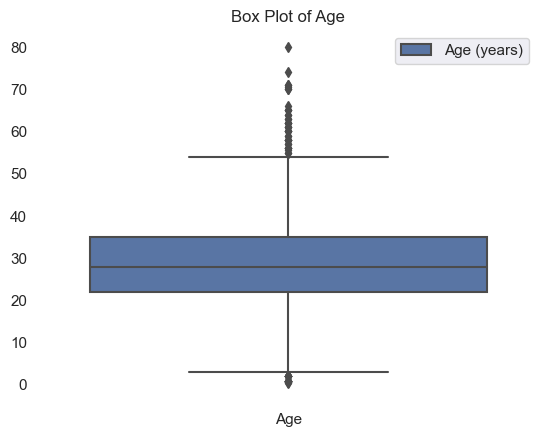

In [126]:
sns.boxplot(data=train_titanic[[ "Age"]])
plt.title('Box Plot of Age', loc="center")
# Add a legend for the units of each variable
plt.legend(labels=['Age (years)'], loc='upper right')
plt.gca().set_facecolor('none') # para tirar a linhas cizentas


C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\Pyt

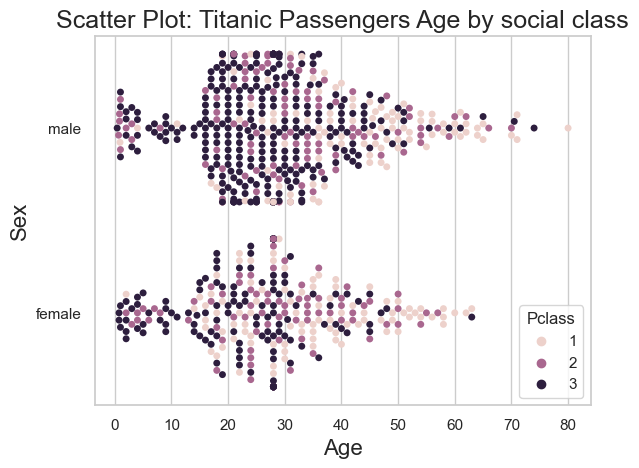

In [127]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=train_titanic, x="Age", y="Sex", hue="Pclass")
ax.set(ylabel="")

plt.title('Scatter Plot: Titanic Passengers Age by social class', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Sex', fontsize=16)
plt.show()

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\Pyt

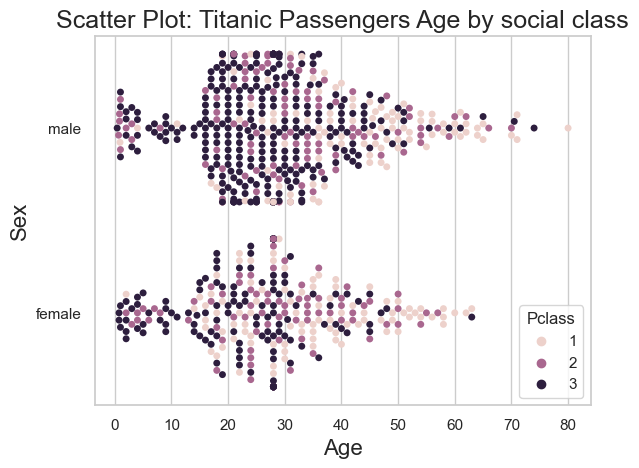

In [128]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=train_titanic, x="Age", y="Sex", hue="Pclass")
ax.set(ylabel="")

plt.title('Scatter Plot: Titanic Passengers Age by social class', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Sex', fontsize=16)

plt.show()

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\Pyt

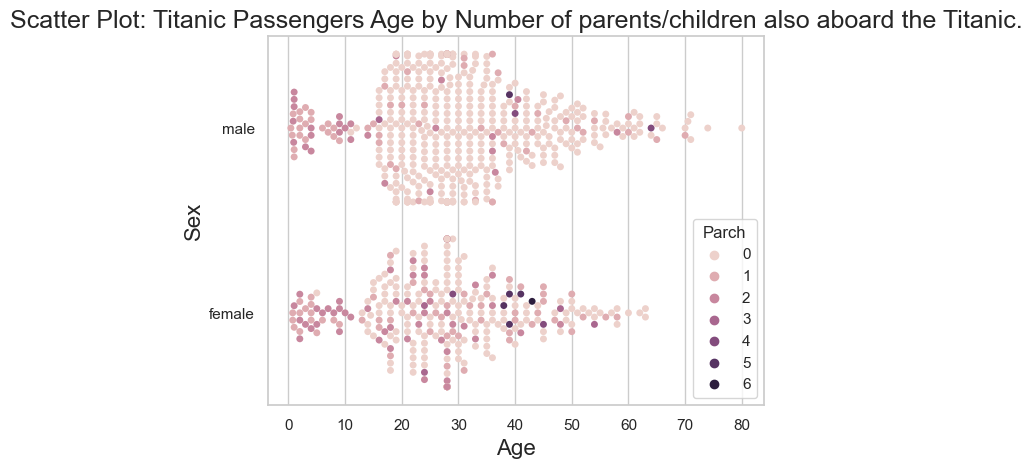

In [129]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=train_titanic, x="Age", y="Sex", hue="Parch")
ax.set(ylabel="")

plt.title('Scatter Plot: Titanic Passengers Age by Number of parents/children also aboard the Titanic.', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Sex', fontsize=16)

plt.show()

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\Pyt

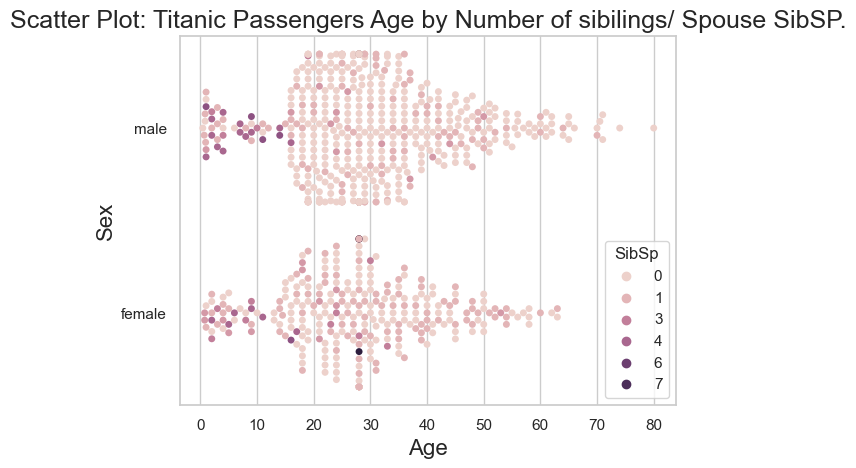

In [130]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=train_titanic, x="Age", y="Sex", hue="SibSp")
ax.set(ylabel="")

plt.title('Scatter Plot: Titanic Passengers Age by Number of sibilings/ Spouse SibSP.', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Sex', fontsize=16)

plt.show()

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jlapa\AppData\Local\Packages\Pyt

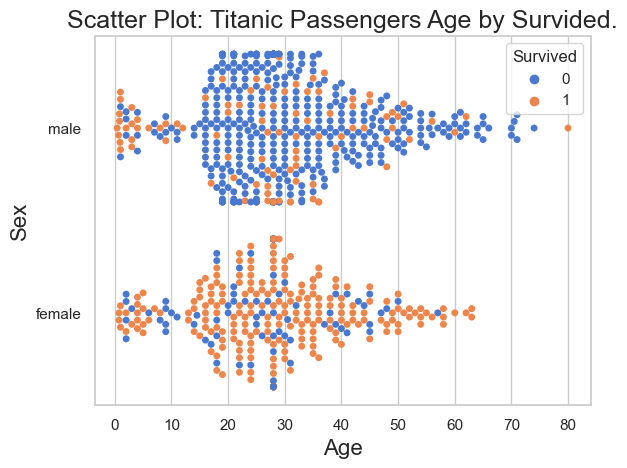

In [131]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=train_titanic, x="Age", y="Sex", hue="Survived")
ax.set(ylabel="")

plt.title('Scatter Plot: Titanic Passengers Age by Survided.', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Sex', fontsize=16)

plt.show()

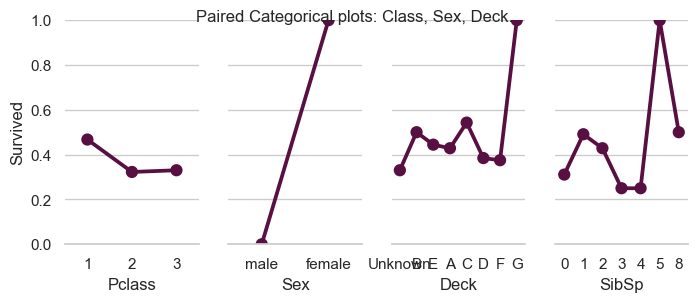

In [132]:
sns.set_theme(style="whitegrid")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(test_titanic, y_vars="Survived",
                 x_vars=["Pclass", "Sex",'Deck','SibSp'],
                 height=3, aspect=.6)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1, errwidth=0, color="xkcd:plum")
g.set(ylim=(0, 1))

# Add a title and centralize it
plt.suptitle('Paired Categorical plots: Class, Sex, Deck.', fontsize=12, ha='center')

# Remove the top and right spines of the plot
sns.despine(fig=g.fig, left=True)

### Correlation Matrix

In [133]:
corr_matrix = train_titanic.corr()
corr_matrix["Age"].sort_values(ascending=False)

C:\Users\jlapa\AppData\Local\Temp\ipykernel_23028\452362481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_titanic.corr()


Age            1.000000
Fare           0.096688
PassengerId    0.034212
Survived      -0.064910
Parch         -0.172482
SibSp         -0.233296
Pclass        -0.339898
Name: Age, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

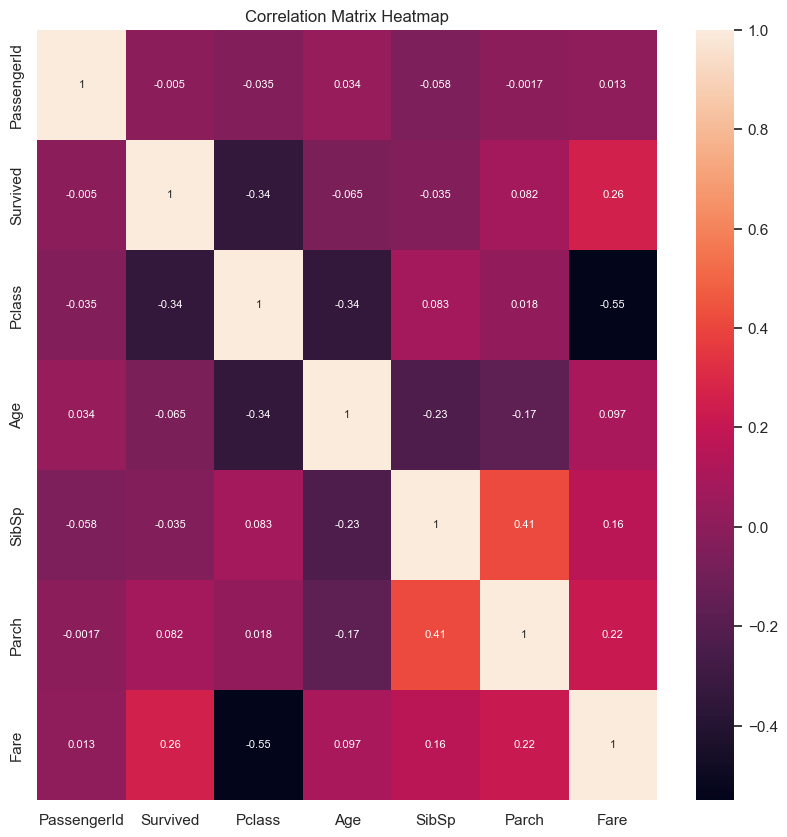

In [134]:
plt.figure(figsize=(10,10)) #to increase the size of the figure
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 8})
plt.title("Correlation Matrix Heatmap", loc="center")

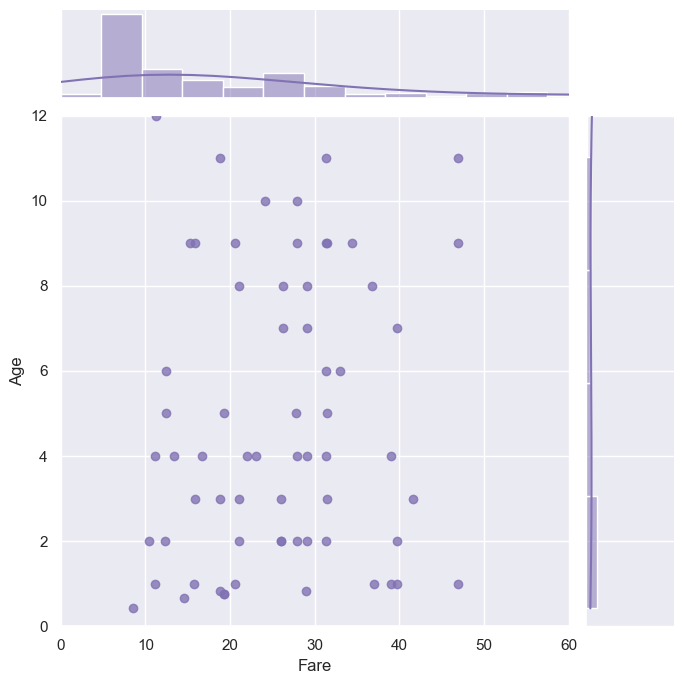

In [135]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="Fare", y="Age", data=train_titanic,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

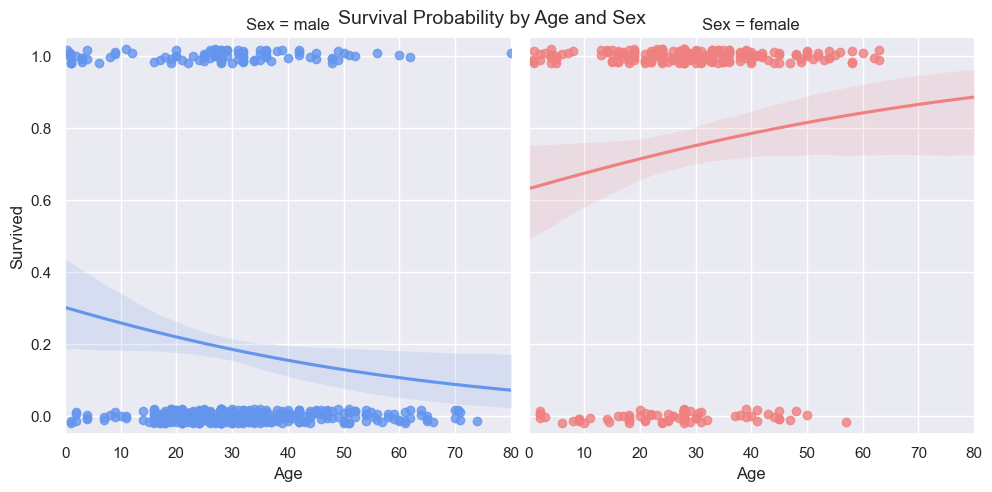

In [136]:
sns.set_theme(style="darkgrid")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=train_titanic,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

# Set the figure title
g.fig.suptitle("Survival Probability by Age and Sex", fontsize=14)

# Show the plot
sns.despine()

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


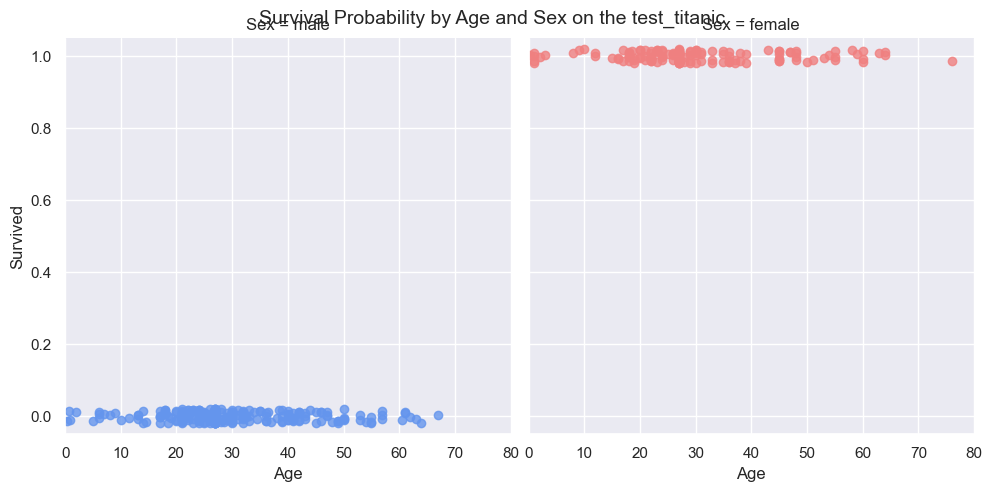

In [137]:
sns.set_theme(style="darkgrid")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=test_titanic,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

# Set the figure title
g.fig.suptitle("Survival Probability by Age and Sex on the test_titanic", fontsize=14)

# Show the plot
sns.despine()

In [138]:
import statsmodels.api as sm

# Conver 'Sex' variable to a binary variable (0 for male, 1 for female)
train_titanic['Sex'] = pd.get_dummies(train_titanic['Sex'], drop_first=True)
test_titanic['Sex'] = pd.get_dummies(test_titanic['Sex'], drop_first=True)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

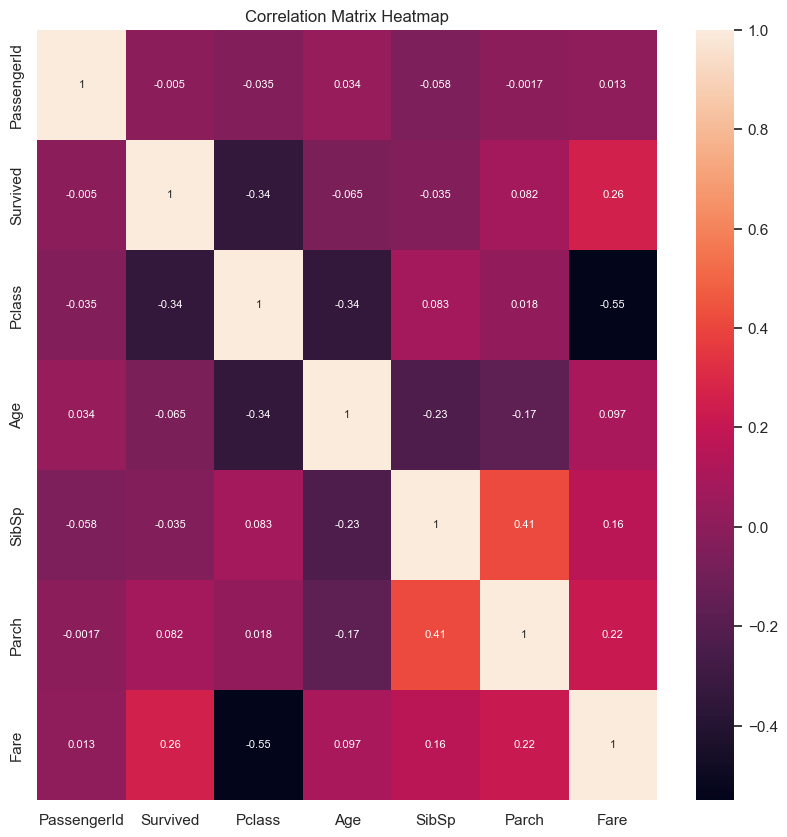

In [139]:
plt.figure(figsize=(10,10)) #to increase the size of the figure
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 8})
plt.title("Correlation Matrix Heatmap", loc="center")

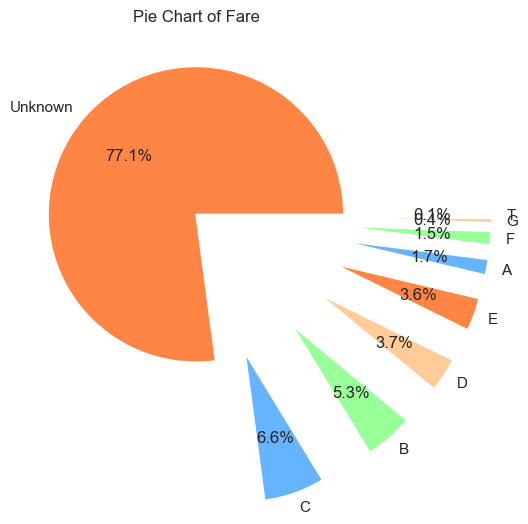

In [140]:
# Create a pandas series containing the data
data = train_titanic['Deck'].value_counts() # data is a pandas series containing the counts of each type of network transmiting earthquake

# Create the pie chart
colors = ["#ff8545","#66b3ff","#99ff99","#ffcc99"]
#autopct parameter is used to format the values of the chart, in this case it is showing the percentage with one decimal point.
explode = [ 1 if i < 0.1 else 0 for i in data/data.sum()]
plt.pie(data, labels=data.index, autopct='%1.1f%%',colors=colors,explode = explode) #labels parameter is used to provide the categories of the data, in this case the different types of networks

plt.title('Pie Chart of Fare', loc="center")
plt.show()

### Logistic regression

To perform a logistic regression for survival compared with sex and gender, you would need to follow these steps:

First, make sure your data is properly cleaned and prepared for analysis. This may involve removing missing values, transforming variables, or encoding categorical variables.

Next, select the variables you want to include in the model. In this case, you would select "Survived," "Sex," and "Pclass" (which indicates passenger class).

Use a statistical software package, such as Python, to fit the logistic regression model. In R, you can use the glm() function to fit a logistic regression model, while in Python, you can use the logistic regression function from the scikit-learn library.

Interpret the results of the logistic regression model. The coefficients for the "Sex" and "Pclass" variables will indicate the effect of these variables on the likelihood of survival, while the intercept term will represent the baseline probability of survival.

You can also evaluate the overall performance of the model using metrics such as accuracy, precision, and recall.

## Logistic Regression of the test data

In [141]:
import statsmodels.api as sm

# Conver 'Sex' variable to a binary variable (0 for male, 1 for female)
train_titanic['Sex'] = pd.get_dummies(train_titanic['Sex'], drop_first=True)
test_titanic['Sex'] = pd.get_dummies(test_titanic['Sex'], drop_first=True)

This code adds an intercept column to the test_titanic DataFrame using the sm.add_constant() function, and then makes predictions using the logistic regression model by passing the 'const' and 'Sex' columns of the test_titanic DataFrame to the predict() method. Note that you need to specify the column names as a list when selecting the data, and include the 'const' column that was added by the sm.add_constant() function.

In [142]:
# Fit the logistic regression model
X = train_titanic[['Sex']].values
y = train_titanic['Survived'].values

In [143]:
## As we had two tables, train and test, I needed to define the variables x_test and Y_test
X_test = test_titanic[['Sex']].values
y_test = test_titanic['Survived'].values

In [144]:
LogisticRegression_model = LogisticRegression(random_state=0) # Logistic regression model
LogisticRegression_model.fit(X,y) ##train the model

LogisticRegression(random_state=0)

In [145]:
prediction = LogisticRegression_model.predict(X_test) #predict the response

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction)
print(confusion_matrix)

[[266   0]
 [  0 152]]


In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("Accuracy score: ",accuracy_score(y_test,prediction))
print("Precision score: ", precision_score(y_test, prediction, average='macro'))

##this result goes in line with the logistic graph plotted.

Accuracy score:  1.0
Precision score:  1.0


Standard scaling or normalization is generally not required for logistic regression, as logistic regression is not affected by the scale of the variables. However, standardizing the variables can sometimes improve the convergence of the optimization algorithm and make the coefficients easier to interpret. Additionally, if you plan to include other variables in your model that may have different scales, standardizing the variables can help ensure that each variable is on a similar scale and has a similar impact on the outcome.

###  Logistic Regression, using train data and creating another test data from the train model

In [148]:
# Fit the logistic regression model into the train 
X = train_titanic[['Sex']].values
y = train_titanic['Survived'].values

In [149]:
# Slip the dataset titanic_train into a test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [150]:
LogisticRegression_model = LogisticRegression(random_state=0) # Logistic regression model
LogisticRegression_model.fit(X_train,y_train) ##train the model

LogisticRegression(random_state=0)

In [151]:
#Predict on the test model
prediction = LogisticRegression_model.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction)
print(confusion_matrix)
# Our model correctly predicted 115 of the 140 who survided. 
#The model also predicted 59 of the 84 not surviving cases and incorrectly predicted 25.


[[115  24]
 [ 25  59]]


In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("Accuracy score: ",accuracy_score(y_test,prediction))
print("Precision score: ", precision_score(y_test, prediction, average='macro'))

## The model predicted the outcomes correctly 78% of the time
##The model predicted a passenger to survive, it was correct 77% of the time.

Accuracy score:  0.7802690582959642
Precision score:  0.7661359724612736


## Naives_Bayes model

In [154]:
train_titanic.loc[train_titanic['Pclass']<2] # only those rows which were first class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,E
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S,C
23,24,1,1,"Sloper, Mr. William Thompson",1,28.0,0,0,113788,35.5000,A6,S,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S,D
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S,B
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C,C
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,B


In [155]:
## Transform a numerical varible into a categorical 

# define the bins and labels for the categories
bins = [0, 1, 2, 3]
labels = ['First Class', 'Middle Class', 'Third Class']

# create a new column with the categorical variable
train_titanic['Pclass_Categories'] = pd.cut(train_titanic['Pclass'], bins=bins, labels=labels)

# print the updated DataFrame
print(train_titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked     Deck Pclass_Categories  
0         A/5 21171   7.2500   NaN        S  Unknown       Third Class  
1          PC 17599  71.2833   C85        C        C       First Class  
2  STON/O2. 3101282   7.9250   NaN        S  Unknown       Third Class  
3   

In [156]:
train_titanic['Sex'] = pd.get_dummies(train_titanic['Sex'], drop_first=True)
test_titanic['Sex'] = pd.get_dummies(test_titanic['Sex'], drop_first=True)

In [157]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Pclass_Categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Unknown,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,First Class
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unknown,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,First Class
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Unknown,Third Class


In [158]:
train_titanic.index = train_titanic.iloc[:,0] # Name rows as passager number
X = train_titanic.iloc [:, 2].values.reshape(-1, 1) # will be ignored as is going to be our label/ model it will be train appon
Y = train_titanic.iloc[:, 1].values.reshape(-1, 1)  #data target

In [159]:
#make an object
gaussian_model = GaussianNB()

In [160]:
# Train the model 
gaussian_model.fit(X_train, y_train) # THE MODEL WILL BE TRAINed based on the 80% of data given

GaussianNB()

In [161]:
prediction = gaussian_model.predict(X_test) # Predict the response

In [162]:
result = {'Survided':y_test, 'pred':prediction}
result_df = pd.DataFrame(result)

In [163]:
print("Accuracy:", metrics.accuracy_score(y_test, prediction)) # Checking NB accuracy

Accuracy: 0.7802690582959642


## Decision Tree Models

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [165]:
encoder = preprocessing.LabelEncoder() # creating labelEncoder

In [166]:
# Converting strings into numbers
PassengerId_encoded=encoder.fit_transform(train_titanic.iloc[:,0])
Survived_encoded=encoder.fit_transform(train_titanic.iloc[:,1])
Pclass_encoded=encoder.fit_transform(train_titanic.iloc[:,2])
Name_encoded=encoder.fit_transform(train_titanic.iloc[:,3])
Sex_encoded=encoder.fit_transform(train_titanic.iloc[:,4])
Age_encoded=encoder.fit_transform(train_titanic.iloc[:,5])
SibSp_encoded=encoder.fit_transform(train_titanic.iloc[:,6])
Parch_encoded=encoder.fit_transform(train_titanic.iloc[:,7])
Ticket_encoded=encoder.fit_transform(train_titanic.iloc[:,8])
Fare_encoded=encoder.fit_transform(train_titanic.iloc[:,9])
Cabin_encoded=encoder.fit_transform(train_titanic.iloc[:,10])
Embark_encoded=encoder.fit_transform(train_titanic.iloc[:,11])

In [167]:
# Combining encoded data
train_titanic=list(zip(PassengerId_encoded,Survived_encoded,Pclass_encoded,Name_encoded,Sex_encoded,Age_encoded,SibSp_encoded,Parch_encoded,Ticket_encoded,Fare_encoded,Cabin_encoded,Embark_encoded))
train_titanic = pd.DataFrame(data, columns = ['PassengerId', 'Survided', 'Pclass', 'Name', 'Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embark'])
data_to_use = train_titanic.iloc[:, 2:11]
data_to_target = train_titanic.iloc[:,1]

In [168]:
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (668, 1)
X_Test size is: (223, 1)
Y_train size is: (668,)
Y_Test size is: (418,)


In [169]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [170]:
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (712, 1)
X_Test size is: (179, 1)
Y_train size is: (712,)
Y_Test size is: (418,)


In [171]:
# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

In [172]:
# Use entropy criterion
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")


In [173]:
# Use max depth of 3
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

In [174]:
# Fit the trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [175]:
# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

In [176]:
print("Accuracy (gini):",metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (depth3):",metrics.accuracy_score(y_test, y_pred_depth3))
#you have trained and tested three different decision tree models using different criteria (gini, entropy, and max depth of 3).
# the models correctly classified 70% of the instances in your test data

Accuracy (gini): 0.7039106145251397
Accuracy (entropy): 0.7039106145251397
Accuracy (depth3): 0.7039106145251397


In [177]:
from sklearn.metrics import label_ranking_average_precision_score
y_true = np.array([[1, 0, 0], [0, 0, 1]])
y_score = np.array([[0.75, 0.5, 1], [1, 0.2, 0.1]])
label_ranking_average_precision_score(y_true, y_score)


0.41666666666666663